In [2]:
import pandas as pd

In [3]:
incidents_df = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_INCIDENTS.csv")

/var/folders/lc/w78wfs6n3fq6kk92kdlwfcbh0000gn/T/ipykernel_13302/3939999780.py:1: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_df = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_INCIDENTS.csv")


In [4]:
# Identify columns for level 1 information on tactics, weapons, and victims
lvl1_columns = {
    'tactics_lvl1_': [],
    'weapon_lvl1_': [],
    'victim_lvl1_': []
}
icat_columns = []

incidents_df.rename(columns = {'ICat_ANA': 'Anarchist_G',
                                'ICat_Ethn': 'Ethnonationalist/Separatist_G',
                                'ICat_Iran': 'Iranian-Backed_G',
                                'ICat_Left': 'Left-Wing/Revolutionary Extremist_G',
                                'ICat_Right': 'Right-Wing Extremist_G',
                                'ICat_Rhbjc': 'Religious (Other - Hindu, Buddhist, Jewish, Christian)_G',
                                'ICat_Rjih': 'Religious (Jihadist)_G',
                                'ICat_Single': 'Lone Actors_G',
                                'ICat_Unknown': 'Unknown_G',
                                'ICat_Vig': 'Vigilante (Pro-Government)_G'}, inplace = True)


for column in incidents_df.columns:
    if column.startswith(('tactic_lvl1_', 'weapon_lvl1_', 'victim_lvl1_')):
        if 'tactic' in column:
            lvl1_columns['tactics_lvl1_'].append(column)
        elif 'weapon' in column:
            lvl1_columns['weapon_lvl1_'].append(column)
        elif 'victim' in column:
            lvl1_columns['victim_lvl1_'].append(column)
    elif column.endswith('_G'):
#    elif '_G' in columns:
        icat_columns.append(column)




lvl1_columns, len(icat_columns)


({'tactics_lvl1_': ['tactic_lvl1_as',
   'tactic_lvl1_co',
   'tactic_lvl1_cv',
   'tactic_lvl1_ex',
   'tactic_lvl1_tr',
   'tactic_lvl1_un'],
  'weapon_lvl1_': ['weapon_lvl1_ex',
   'weapon_lvl1_fi',
   'weapon_lvl1_im',
   'weapon_lvl1_in',
   'weapon_lvl1_ml',
   'weapon_lvl1_ot',
   'weapon_lvl1_ua',
   'weapon_lvl1_un'],
  'victim_lvl1_': ['victim_lvl1_ci',
   'victim_lvl1_go',
   'victim_lvl1_gp',
   'victim_lvl1_mi',
   'victim_lvl1_ot',
   'victim_lvl1_po',
   'victim_lvl1_pr',
   'victim_lvl1_nn']},
 10)

In [5]:
# Calculate the sum of killed for each group across the identified level 1 categories
killed_summaries = pd.DataFrame(index=icat_columns)

# Calculate the totals for each group across tactics, weapons, and victims
for category, columns in lvl1_columns.items():
    killed_summaries[category] = incidents_df[icat_columns].multiply(incidents_df[columns].sum(axis=1) * incidents_df['num_killed'], axis="index").sum()
killed_summaries


,tactics_lvl1_,weapon_lvl1_,victim_lvl1_
Anarchist_G,15,15,21
Ethnonationalist/Separatist_G,84994,79181,98905
Iranian-Backed_G,11045,11780,10712
Left-Wing/Revolutionary Extremist_G,2280,2161,2396
Right-Wing Extremist_G,46,46,55
"Religious (Other - Hindu, Buddhist, Jewish, Christian)_G",129,149,124
Religious (Jihadist)_G,128411,114450,143216
Lone Actors_G,9,9,12
Unknown_G,1321,1135,1476
Vigilante (Pro-Government)_G,1756,1692,2061


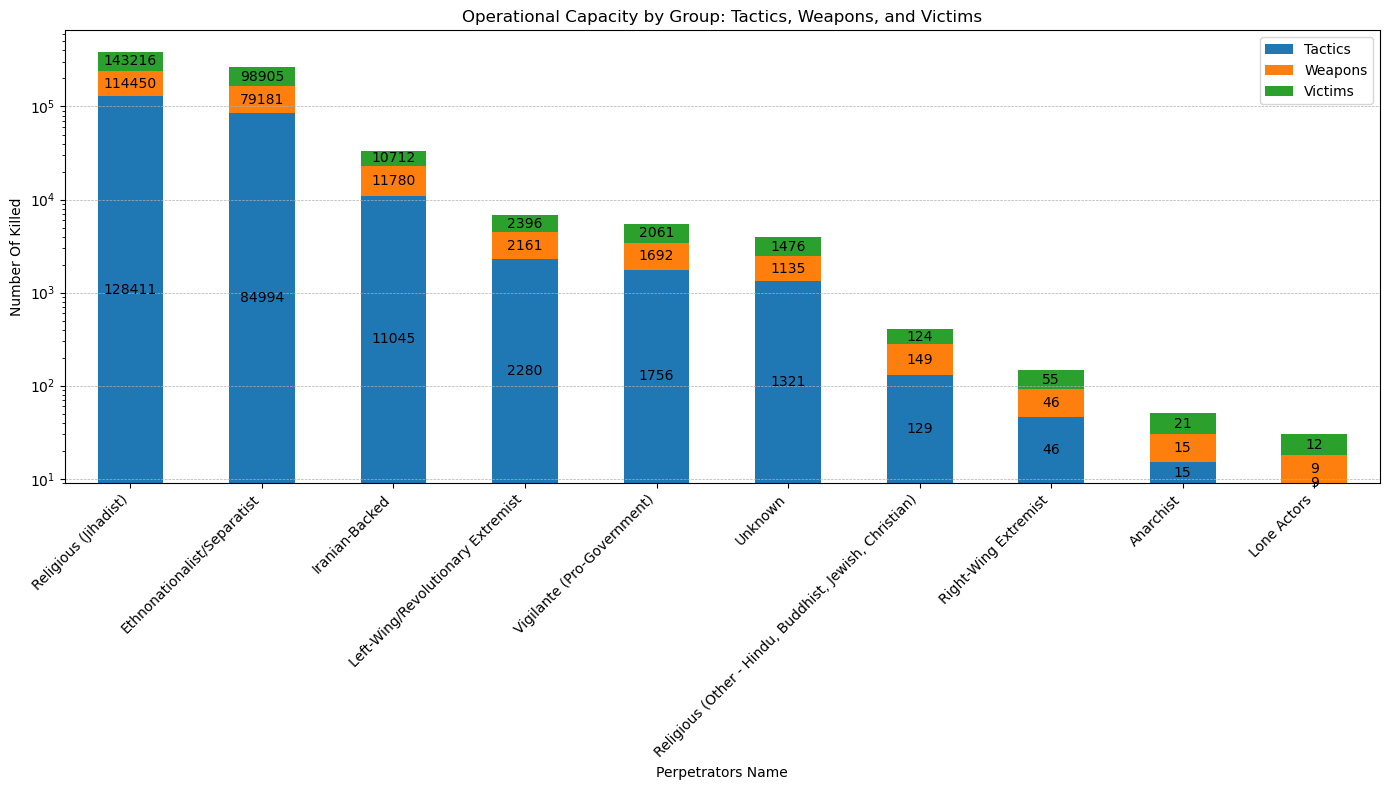

In [6]:
import matplotlib.pyplot as plt
# Prepare the data for the stacked bar graph
killed_summaries_sorted = killed_summaries.sort_values(by=['tactics_lvl1_', 'weapon_lvl1_', 'victim_lvl1_'], ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = killed_summaries_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Operational Capacity by Group: Tactics, Weapons, and Victims')
ax.set_xlabel('Perpetrators Name')
ax.set_ylabel('Number Of Killed')
ax.legend(['Tactics', 'Weapons', 'Victims'], loc='upper right')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add horizontal grid lines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Display the number of killed at the top of each bar
for container in bars.containers:
    ax.bar_label(container, label_type='center')
    
# Remove the '_G' suffix from the x-axis labels
ax.set_xticklabels([label.get_text().replace('_G', '') for label in ax.get_xticklabels()])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Calculate the sum of wounded for each group across the identified level 1 categories
wounded_summaries = pd.DataFrame(index=icat_columns)

# Calculate the totals for each group across tactics, weapons, and victims
for category, columns in lvl1_columns.items():
    wounded_summaries[category] = incidents_df[icat_columns].multiply(incidents_df[columns].sum(axis=1) * incidents_df['num_wounded'], axis="index").sum()
wounded_summaries

,tactics_lvl1_,weapon_lvl1_,victim_lvl1_
Anarchist_G,12,12,14
Ethnonationalist/Separatist_G,54441,49861,64263
Iranian-Backed_G,13834,14872,11243
Left-Wing/Revolutionary Extremist_G,2822,2489,2685
Right-Wing Extremist_G,102,106,105
"Religious (Other - Hindu, Buddhist, Jewish, Christian)_G",194,208,247
Religious (Jihadist)_G,89563,77036,101398
Lone Actors_G,40,70,40
Unknown_G,1307,1286,1681
Vigilante (Pro-Government)_G,1359,1499,1730


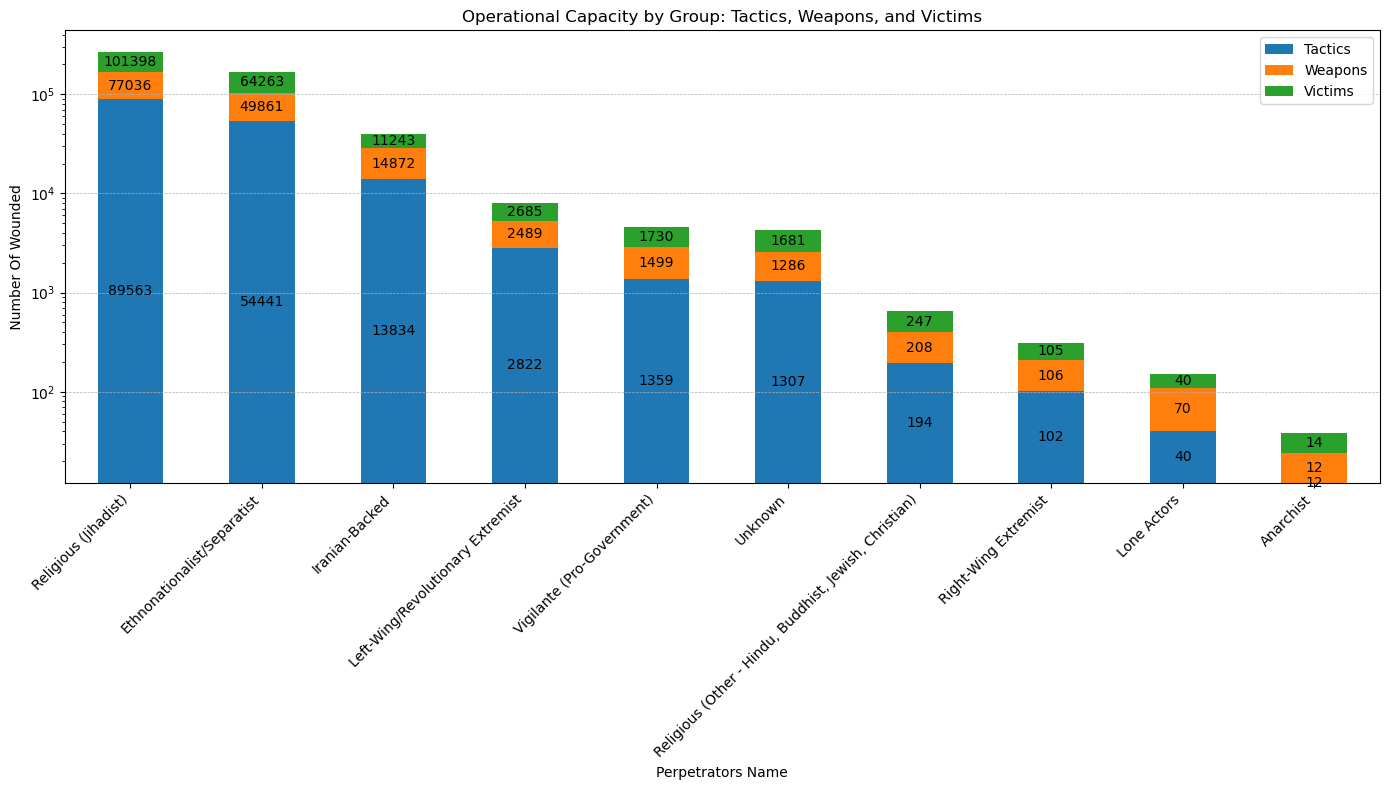

In [8]:
# Prepare the data for the stacked bar graph
wounded_summaries_sorted = wounded_summaries.sort_values(by=['tactics_lvl1_', 'weapon_lvl1_', 'victim_lvl1_'], ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = wounded_summaries_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Operational Capacity by Group: Tactics, Weapons, and Victims')
ax.set_xlabel('Perpetrators Name')
ax.set_ylabel(' Number Of Wounded ')
ax.legend(['Tactics', 'Weapons', 'Victims'], loc='upper right')


# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add horizontal grid lines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Display the number of killed at the top of each bar
for container in bars.containers:
    ax.bar_label(container, label_type='center')
    

# Remove the '_G' suffix from the x-axis labels
ax.set_xticklabels([label.get_text().replace('_G', '') for label in ax.get_xticklabels()])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Calculate the sum of kidnapped for each group across the identified level 1 categories
hostkid_summaries = pd.DataFrame(index=icat_columns)

# Calculate the totals for each group across tactics, weapons, and victims
for category, columns in lvl1_columns.items():
    hostkid_summaries[category] = incidents_df[icat_columns].multiply(incidents_df[columns].sum(axis=1) * incidents_df['num_hostkid'], axis="index").sum()
hostkid_summaries


,tactics_lvl1_,weapon_lvl1_,victim_lvl1_
Anarchist_G,0,0,0
Ethnonationalist/Separatist_G,20613,14235,16181
Iranian-Backed_G,1028,992,754
Left-Wing/Revolutionary Extremist_G,570,525,548
Right-Wing Extremist_G,0,0,0
"Religious (Other - Hindu, Buddhist, Jewish, Christian)_G",53,42,37
Religious (Jihadist)_G,19608,13913,14841
Lone Actors_G,0,0,0
Unknown_G,174,113,125
Vigilante (Pro-Government)_G,119,105,143


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


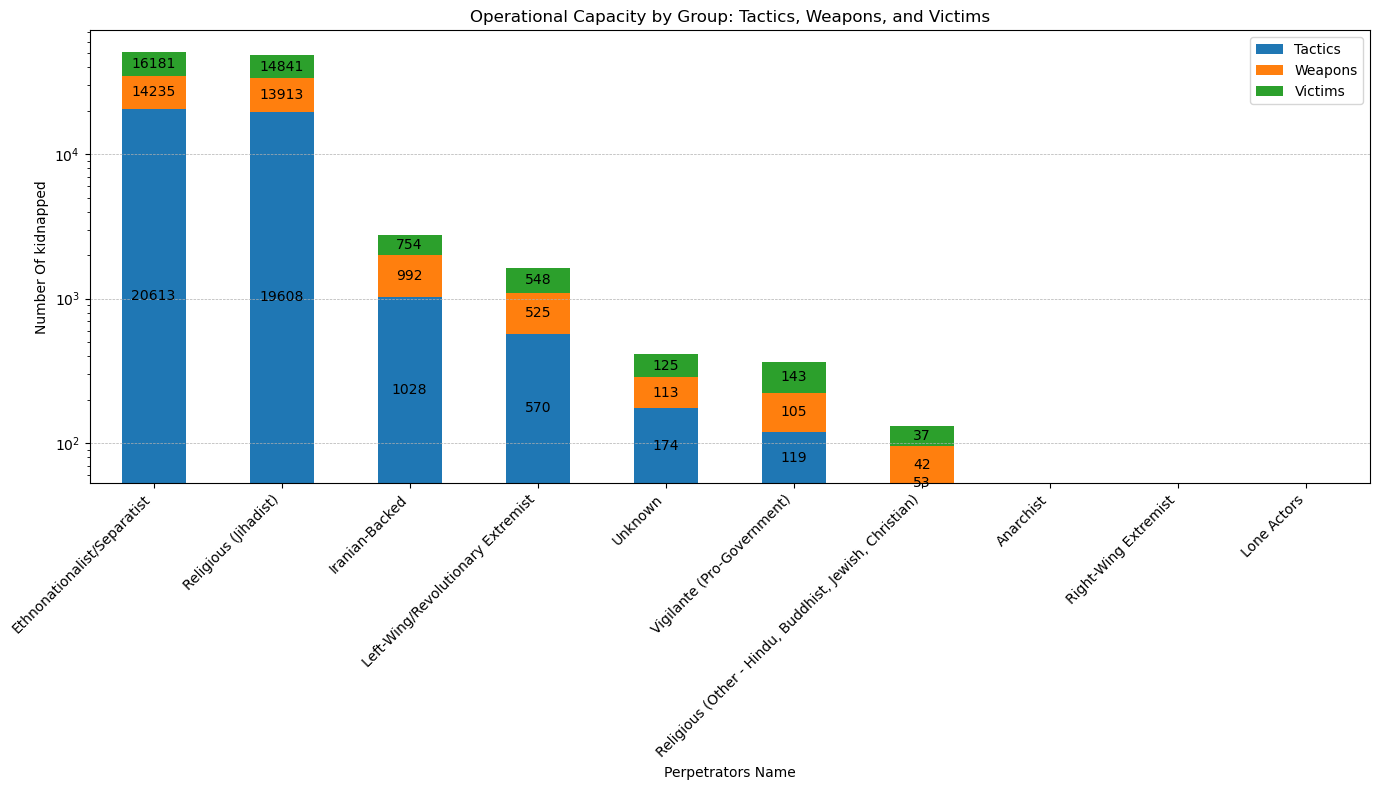

In [10]:
# Prepare the data for the stacked bar graph
hostkid_summaries_sorted = hostkid_summaries.sort_values(by=['tactics_lvl1_', 'weapon_lvl1_', 'victim_lvl1_'], ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = hostkid_summaries_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Operational Capacity by Group: Tactics, Weapons, and Victims')
ax.set_xlabel('Perpetrators Name')
ax.set_ylabel('Number Of kidnapped')
ax.legend(['Tactics', 'Weapons', 'Victims'], loc='upper right')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add horizontal grid lines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Display the number of killed at the top of each bar
for container in bars.containers:
    ax.bar_label(container, label_type='center')
    

# Remove the '_G' suffix from the x-axis labels
ax.set_xticklabels([label.get_text().replace('_G', '') for label in ax.get_xticklabels()])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


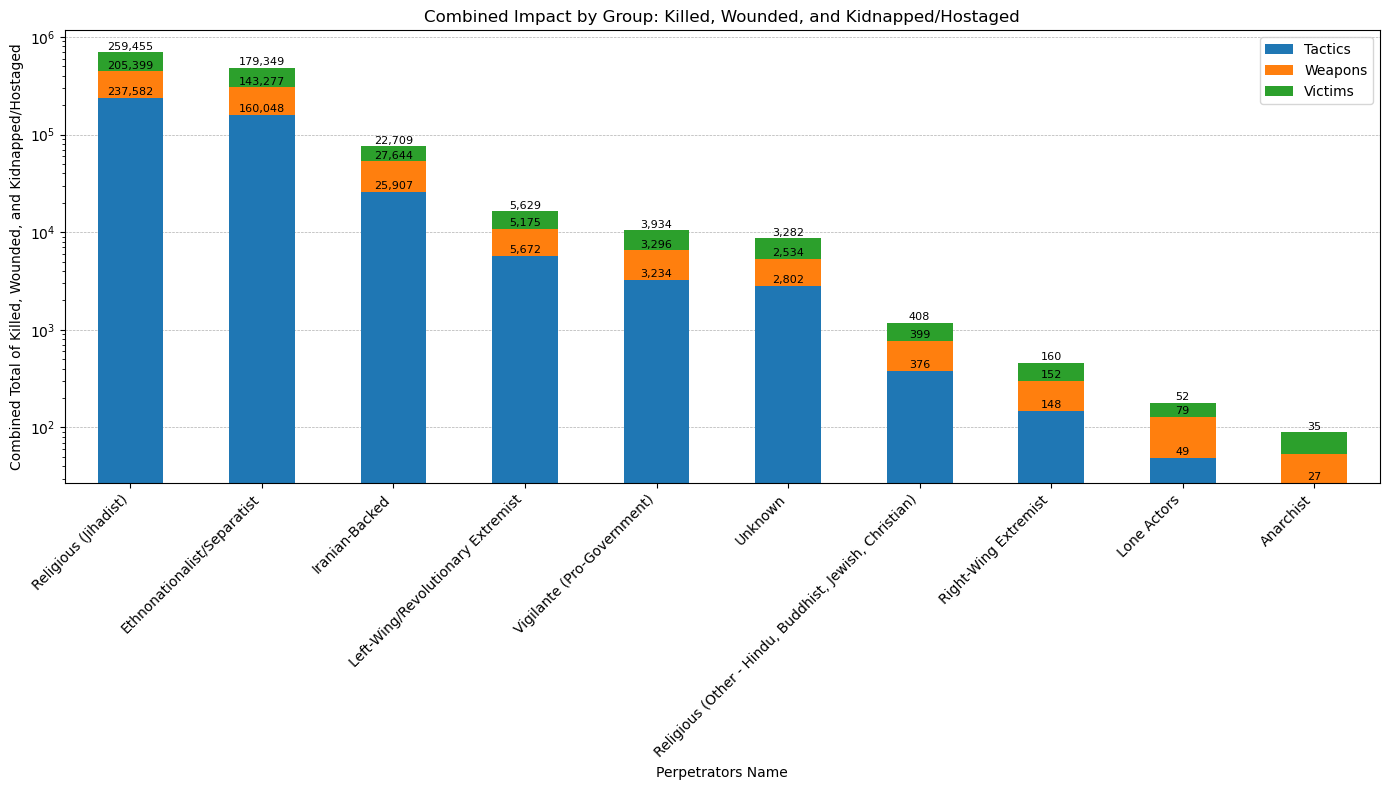

In [12]:
import matplotlib.pyplot as plt

# Assume data processing and setup as before

fig, ax = plt.subplots(figsize=(14, 8))

# Summing up the totals for killed, wounded, and hostkid for each group across all categories
combined_summaries = killed_summaries.add(wounded_summaries, fill_value=0).add(hostkid_summaries, fill_value=0)

# Sorting the DataFrame based on the sum of killed, wounded, and hostkid totals for each group in descending order
combined_summaries['Total'] = combined_summaries.sum(axis=1)
combined_summaries_sorted = combined_summaries.sort_values(by='Total', ascending=False).drop(columns='Total')

# Creating a stacked bar graph from the combined and sorted summaries
bars = combined_summaries_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Combined Impact by Group: Killed, Wounded, and Kidnapped/Hostaged')
ax.set_xlabel('Perpetrators Name')
ax.set_ylabel('Combined Total of Killed, Wounded, and Kidnapped/Hostaged')
ax.legend(['Tactics', 'Weapons', 'Victims'], loc='upper right')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add horizontal grid lines
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Initialize a set to keep track of values that have been labeled
labeled_values = set()

# Display the number of killed at the top of each bar with adjustments for clarity
for container in bars.containers:
    for bar in container:
        height = int(bar.get_height())
        # Only label the bar if it's visible above a certain threshold on the log scale
        if height > 1:  # Adjust this threshold as needed
            label = f'{height:,}'  # Format the label with commas
            # Check if the value has already been labeled to avoid duplicates
            if label not in labeled_values or height == 0:
                labeled_values.add(label)
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height * 1.02,  # Adjust the label position above the bar
                    label,
                    ha='center',
                    va='bottom',
                    color='black',  # Choose a color that stands out
                    fontsize=8,  # Adjust fontsize for readability
                    rotation=0  # Optional: adjust the rotation of the text if desired
                )

# Remove the '_G' suffix from the x-axis labels and handle overflow text
ax.set_xticklabels([label.get_text().replace('_G', '') for label in ax.get_xticklabels()], rotation=45, ha='right')

# Improve the layout to accommodate label text
plt.gca().set_axisbelow(True)
plt.tight_layout()

plt.show()
